In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def plot_clustering_metrics(csv_files, labels, filename):
    """
    Plots clustering metrics (Homogeneity, Completeness, V-Measure, RMSE) from multiple CSV files.
    
    Parameters:
    csv_files (list of str): List of CSV file paths.
    labels (list of str): List of labels for each CSV file.
    filename (str): Output filename for the plot.
    """
    if not csv_files or not labels or len(csv_files) != len(labels):
        print("Invalid input: Ensure that csv_files and labels are non-empty and of the same length.")
        return
    
    # Define colors and linestyles
    colors = sns.color_palette("tab10")
    linestyles = ['-', '--', '-.', ':']  # List of line styles

    sns.set(style="whitegrid")
    fig, axes = plt.subplots(4, 1, figsize=(8.3, 11.7))

    for i, (csv_file, label) in enumerate(zip(csv_files, labels)):
        # Read the CSV file
        df = pd.read_csv(csv_file)
        if 'length' not in df.columns or 'homogeneity' not in df.columns or \
           'completeness' not in df.columns or 'v_measure' not in df.columns or 'rmse' not in df.columns:
            print(f"Invalid format in file: {csv_file}")
            continue
        
        df = df.sort_values('length')
        color = colors[i % len(colors)]
        linestyle = linestyles[i % len(linestyles)]

        # Plotting each metric
        sns.lineplot(
            ax=axes[0],
            x='length',
            y='v_measure',
            data=df,
            label=f'{label}',
            color=color,
            linestyle=linestyle,
            marker='o',
            linewidth=2
        )

        sns.lineplot(
            ax=axes[1],
            x='length',
            y='homogeneity',
            data=df,
            label=f'{label}',
            color=color,
            linestyle=linestyle,
            marker='o',
            linewidth=2
        )
        
        sns.lineplot(
            ax=axes[2],
            x='length',
            y='completeness',
            data=df,
            label=f'{label}',
            color=color,
            linestyle=linestyle,
            marker='o',
            linewidth=2
        )
        
        sns.lineplot(
            ax=axes[3],
            x='length',
            y='rmse',
            data=df,
            label=f'{label}',
            color=color,
            linestyle=linestyle,
            marker='o',
            linewidth=2
        )
    
    # Set titles and labels for subplots
    axes[0].set_title('V-Measure Score', fontsize=16)
    axes[0].set_xlabel('', fontsize=14)
    axes[0].set_ylabel('Score', fontsize=14)
    axes[0].tick_params(axis='both', which='major', labelsize=12)

    axes[1].set_title('Homogeneity Score', fontsize=16)
    axes[1].set_xlabel('', fontsize=14)
    axes[1].set_ylabel('Score', fontsize=14)
    axes[1].tick_params(axis='both', which='major', labelsize=12)
    
    axes[2].set_title('Completeness Score', fontsize=16)
    axes[2].set_xlabel('', fontsize=14)
    axes[2].set_ylabel('Score', fontsize=14)
    axes[2].tick_params(axis='both', which='major', labelsize=12)
    
    axes[3].set_title('RMSE', fontsize=16)
    axes[3].set_xlabel('Number of Devices', fontsize=14)
    axes[3].set_ylabel('RMSE', fontsize=14)
    axes[3].tick_params(axis='both', which='major', labelsize=12)
    
    # Adjust spacing between subplots
    plt.tight_layout(rect=[0, 0, 1, 0.96])
    
    # Save the plot as a PDF file
    plt.savefig(filename, format='pdf')
    
    plt.show()


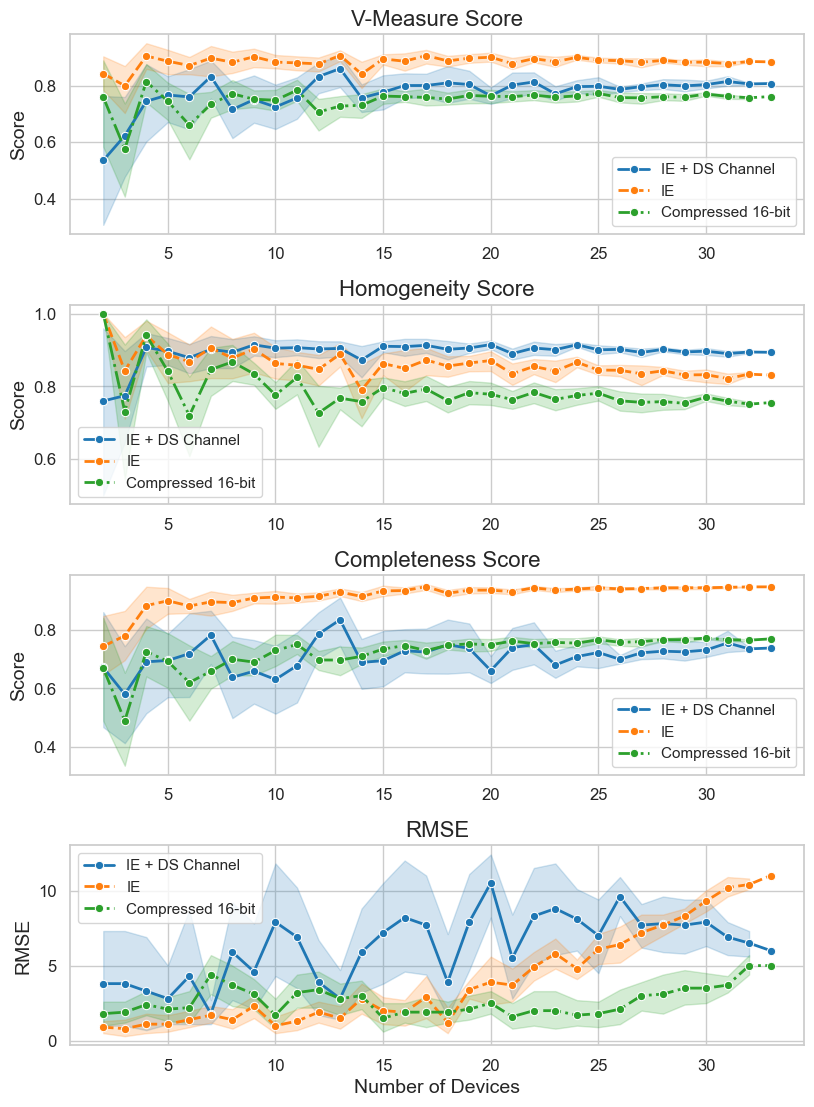

In [6]:
csv_files = ['../../reports/CSV/clustering-sota/results_rmse.csv', '../../reports/CSV/clustering-sota/results_pintor_rmse.csv', '../../reports/CSV/clustering/clustering_results_16.csv']
labels = ['IE + DS Channel', 'IE', 'Compressed 16-bit']
output_file = '../../reports/figures/clustering_sota_metrics_comparison.pdf'

plot_clustering_metrics(csv_files, labels, output_file)